1. Data loading and cleaning
2. Base Neural Network
    1. MLP Multiclass Classification
3. CNN
    1. ResNET

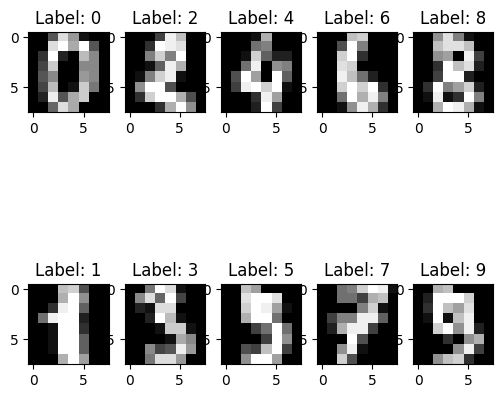

In [1]:
# Import MNIST dataset

from sklearn import datasets
mnist = datasets.load_digits()

# Display a set of images from the dataset

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(6, 6))

for i in range(2):
    for j in range(5):
        ax[i, j].imshow(mnist.images[j*2+i], cmap='gray')
        ax[i, j].set_title(f'Label: {mnist.target[j*2+i]}')

plt.show()

In [2]:
# List the labels and the number of images for each label

import numpy as np

labels, counts = np.unique(mnist.target, return_counts=True)

for label, count in zip(labels, counts):
    print(f'Label: {label}, Count: {count}')

Label: 0, Count: 178
Label: 1, Count: 182
Label: 2, Count: 177
Label: 3, Count: 183
Label: 4, Count: 181
Label: 5, Count: 182
Label: 6, Count: 181
Label: 7, Count: 179
Label: 8, Count: 174
Label: 9, Count: 180


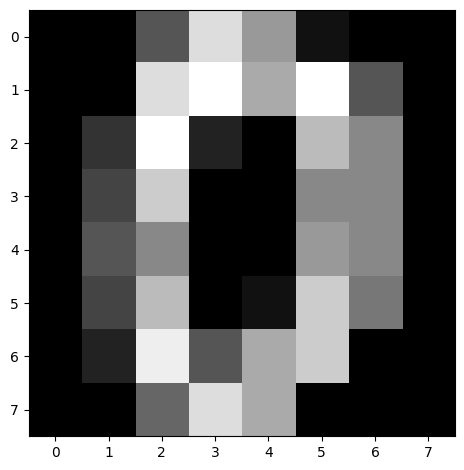

In [5]:
import matplotlib.pyplot as plt

plt.imshow(mnist.images[0] , cmap='gray')
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Data preprocessing
X = mnist.images.reshape((len(mnist.images), -1)) # Flatten the images to a 1D array
print(f'This is now the image: {X[0]}')
y = mnist.target

# Normalize the data
X = X / 255 # 255 is the maximum value of a pixel

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

This is now the image: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
# Train a standard MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()#hidden_layer_sizes=(100,), max_iter=200, alpha=1e-4, batch_size=256, solver='adam', verbose=10, random_state=1, learning_rate_init=.1)
mlp.fit(X_train, y_train)

# Evaluate the model
print(f'Training set score: {mlp.score(X_train, y_train):.3f}')
print(f'Test set score: {mlp.score(X_test, y_test):.3f}')

Training set score: 0.965
Test set score: 0.950


/home/fabiotdt/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
# Get mlp parameters

print(f'Number of layers: {mlp.n_layers_}')
print(f'Number of outputs: {mlp.n_outputs_}')
print(f'Number of iterations: {mlp.n_iter_}')
print(f'Loss: {mlp.loss_:.3f}')

Number of layers: 3
Number of outputs: 10
Number of iterations: 200
Loss: 0.188


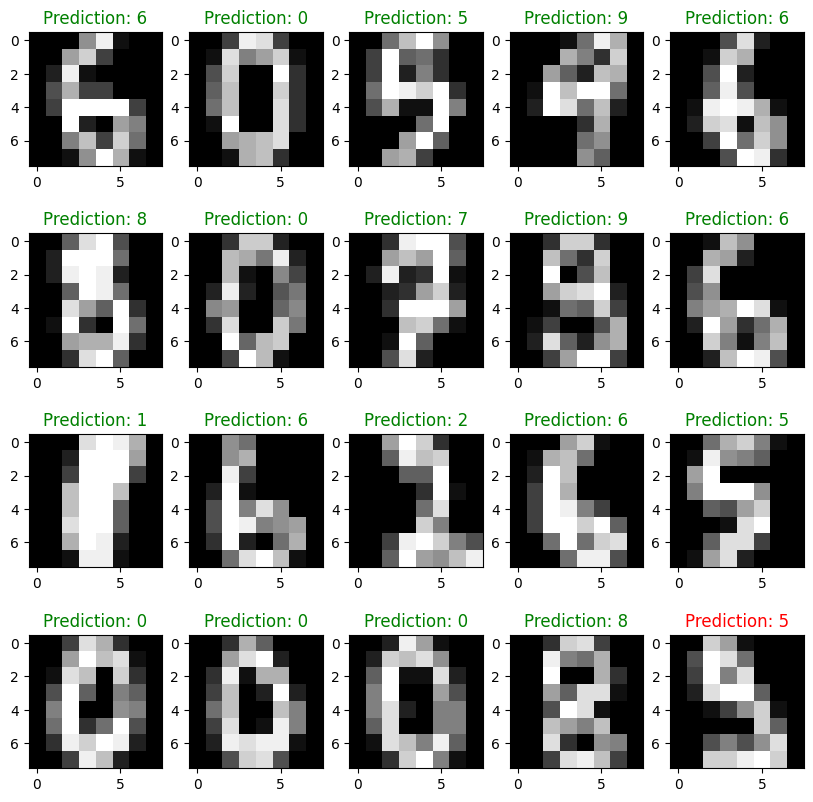

In [6]:
# Predict the a random subset of the test set

test_display = np.random.choice(X_test.shape[0], 20, replace=False)

predictions = mlp.predict(X_test[test_display])

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(X_test[test_display[j*4+i]].reshape(8, 8), cmap='gray')
        if predictions[j*4+i] == y_test[test_display[j*4+i]]:
            ax[i, j].set_title(f'Prediction: {predictions[j*4+i]}', color='green')
        else:
            ax[i, j].set_title(f'Prediction: {predictions[j*4+i]}', color='red')

In [7]:
# Check for each class the percentage of correct predictions

predictions = mlp.predict(X_test)


correct = []
total = []

for i in range(10):
    y_test_i = y_test[y_test == i]
    predictions_i = predictions[y_test == i]

    correct.append(np.sum(y_test_i == predictions_i))
    total.append(len(y_test_i))

performance = np.array(correct) / np.array(total)

sorted_performance = np.argsort(performance)[::-1]

for i in sorted_performance:
    print(f'Label: {i}, Accuracy: {performance[i]:.3f}')


Label: 0, Accuracy: 1.000
Label: 6, Accuracy: 0.977
Label: 8, Accuracy: 0.974
Label: 7, Accuracy: 0.974
Label: 4, Accuracy: 0.967
Label: 3, Accuracy: 0.966
Label: 5, Accuracy: 0.950
Label: 2, Accuracy: 0.917
Label: 9, Accuracy: 0.902
Label: 1, Accuracy: 0.886


In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):
 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward (self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        
        return  F.log_softmax(x, dim = 1)
    
net = Net()


In [19]:
import torchvision
from torchvision import transforms, datasets
import torch

train = datasets.MNIST("", train = True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [23]:
import torch.optim as optim
import torch.nn.functional as F

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range (EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.4124, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)


In [25]:
# Compute the accuracy of the model on the test set

correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(f'Accuracy: {correct/total:.2f}')

Accuracy: 0.97


### Binary classification on images

In [5]:
# Connect with Kaggle API

"""import kaggle
kaggle.api.authenticate()

kaggle.api.dataset_download_files('shaunthesheep/microsoft-catsvsdogs-dataset', path='.', unzip=True)"""

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset


In [3]:
# List the number of images for each category

import matplotlib.pyplot as plt
import cv2
import os


data_dir = 'data/PetImages'
categories = ['Cat', 'Dog']

for category in categories:
  print(f'{len(os.listdir(os.path.join(data_dir, category)))} images of {category}s \n')

12501 images of Cats 

12501 images of Dogs 



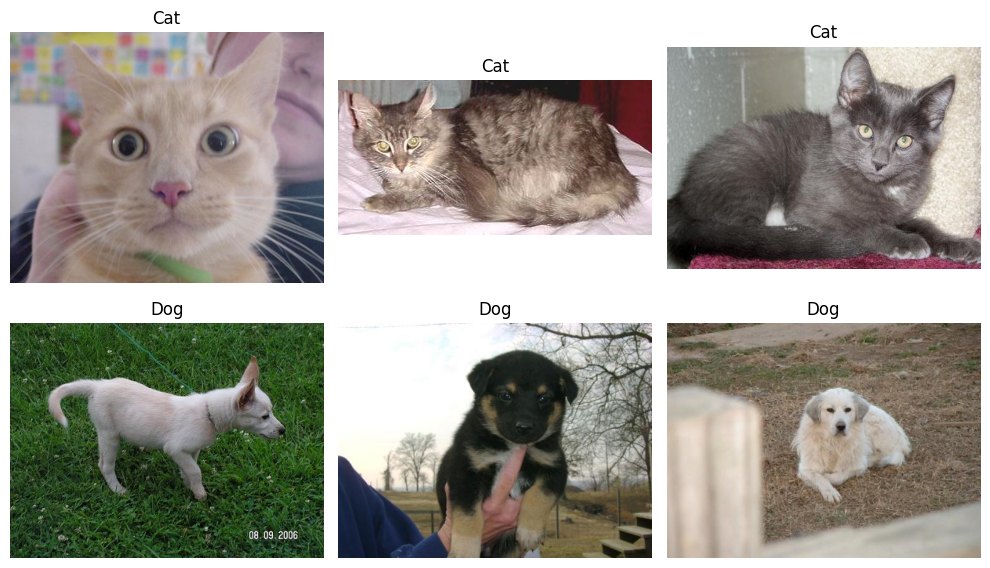

In [4]:
# Display a sample of the images

import matplotlib.pyplot as plt
import os
import cv2
import random

data_dir = 'data/PetImages'
categories = ['Cat', 'Dog']

# Random sample of 3 images for each category
sample = []
for category in categories:
  sample.append(random.sample(os.listdir(os.path.join(data_dir, category)), 3))

# Display the images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, category in enumerate(categories):
  for j, img_name in enumerate(sample[i]):
    img_path = os.path.join(data_dir, category, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
    axes[i, j].imshow(img)
    axes[i, j].set_title(category)
    axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [5]:
import os
import numpy as np
from PIL import Image
import imghdr

import torch
from torch.utils.data import Dataset, DataLoader

from sklearn.decomposition import PCA

class CatsDogsDataset(Dataset):
    
    def __init__(self, data_files, categories, transform=None):
        self.data_dir = data_files
        self.categories = categories
        self.image_paths = []
        self.labels = []
        self.transform = transform

        img_ext = ('.jpg', '.jpeg', '.png')

        for image in self.data_dir:
          if image.lower().endswith(img_ext) and imghdr.what(image) is not None: # check that the image exist and that is not a corrupded file

              self.image_paths.append(image)
              if 'cat' in image.lower(): # Cat are labeledd as 0
                  self.labels.append(0)
              if 'dog' in image.lower(): # Dog labeledd as 1
                  self.labels.append(1)
          
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]

        image = Image.open(image_path).convert("RGB")  # Ensure images are RGB

        if self.transform:
            image = self.transform(image)

        return image, label
    

In [6]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Split the data so to have training, testing and validation set

base_dir = 'data/PetImages'
data = [os.path.join(root, file) for root, _, files in os.walk(base_dir) for file in files ]
random.shuffle(data)

data_for_training = data[:int(0.8 * len(data))]
data_for_testing = data[int(0.8 * len(data)):int(0.9 * len(data))]
data_for_validation = data[int(0.9 * len(data)):]

# Create dataset and dataloader instances
train_data = CatsDogsDataset(data_files=data_for_training, categories = ['Cat', 'Dog'], transform = transform)
test_data = CatsDogsDataset(data_files=data_for_testing, categories = ['Cat', 'Dog'], transform = transform)
valid_data = CatsDogsDataset(data_files=data_for_validation, categories = ['Cat', 'Dog'], transform = transform)


print(f'The length of the training dataset is: {len(train_data)}')
print(f'The length of the testing dataset is: {len(test_data)}')
print(f'The length of the validation dataset is: {len(valid_data)}')

The length of the training dataset is: 19970
The length of the testing dataset is: 2495
The length of the validation dataset is: 2497


In [30]:
print(f'The first element of the dataset is: {next(iter(train_data))}')

The first element of the dataset is: (tensor([[[ 0.1137,  0.0745,  0.0902,  ...,  0.5373,  0.5294,  0.4745],
         [ 0.0980,  0.0667,  0.0980,  ...,  0.5294,  0.5373,  0.5216],
         [ 0.0902,  0.0588,  0.0980,  ...,  0.5451,  0.5451,  0.5451],
         ...,
         [-0.6471, -0.6471, -0.6314,  ..., -0.3490, -0.3961, -0.4431],
         [-0.6706, -0.6627, -0.6314,  ..., -0.3255, -0.3255, -0.3804],
         [-0.6941, -0.6863, -0.6392,  ..., -0.2941, -0.2706, -0.3098]],

        [[ 0.2784,  0.2392,  0.2549,  ...,  0.6314,  0.6314,  0.5686],
         [ 0.2627,  0.2314,  0.2627,  ...,  0.6157,  0.6392,  0.6157],
         [ 0.2549,  0.2235,  0.2627,  ...,  0.6392,  0.6471,  0.6392],
         ...,
         [-0.6000, -0.6000, -0.5843,  ..., -0.3882, -0.4353, -0.4824],
         [-0.6314, -0.6235, -0.5843,  ..., -0.3647, -0.3647, -0.4196],
         [-0.6627, -0.6549, -0.6078,  ..., -0.3333, -0.3098, -0.3490]],

        [[ 0.4118,  0.3725,  0.3882,  ...,  0.7333,  0.7490,  0.6863],
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


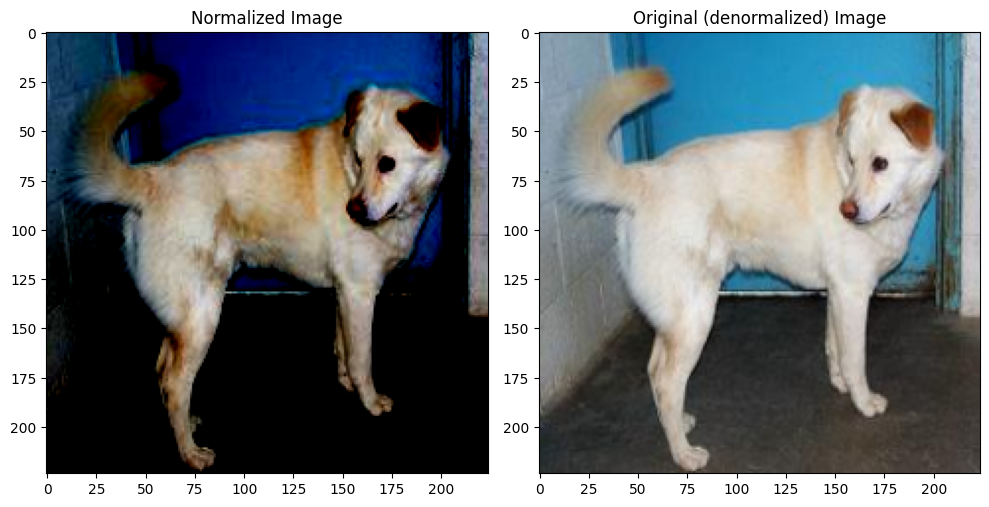

In [31]:
# Check the first image of batch 0 and compare it befor and after normalisation

transform_mean = [0.5, 0.5, 0.5]
transform_std = [0.5, 0.5, 0.5]

denormalized_image = train_data.__getitem__(0)[0] * torch.tensor(transform_std).view(3,1,1) + torch.tensor(transform_mean).view(3,1,1)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].imshow(train_data.__getitem__(0)[0].permute(1, 2, 0))
axes[0].set_title('Normalized Image')

axes[1].imshow(denormalized_image.permute(1, 2, 0))
axes[1].set_title('Original (denormalized) Image')

plt.tight_layout()
plt.show()

In [ ]:
# Implement the Multilayer PErceptron

import torch.nn as nn
import torch.nn.functional as F

class CatDogMLP(nn.Module):

  def __init__(self, input_size):
    super(CatDogMLP, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(input_size, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, 64),
        nn.ReLU(),
        nn.Linear(64, 1),
        nn.Sigmoid()
      
    )

  def forward(self, x):
    return self.model(x)


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

def fit_mlp(model, input_size, dataloader, optimizer, criterion, phase, threshold):
  
  if phase == 'training':
    model.train()
  else:
    model.eval()

  running_loss = []
  for i, data in enumerate(dataloader):

    input = data[0].view(-1, input_size).cuda(0)      
    label = data[1].float().cuda(0)

    if phase == 'training':
      optimizer.zero_grad()

    predictions = model(input).view(-1)
    binary_predictions = (predictions > threshold).view(-1).cpu().numpy()

    loss = criterion(predictions, label)
    running_loss.append(loss.item())
    
    if phase == 'training':
      loss.backward()
      optimizer.step()

  # Computing loss and accuracy
  total_loss = np.asarray(running_loss).mean()
  total_acc = accuracy_score(binary_predictions, label.cpu().numpy())

  return total_loss, total_acc

In [34]:
# Training proccess
import warnings
import sys
warnings.filterwarnings("ignore")

input_size = 224 * 224 * 3

num_epochs = 20
num_workers = 16
batch_size = 128

#criterion = nn.BCELoss() # Binary cross entropy loss

criterion = nn.SmoothL1Loss()

learning_rate = 1e-6
threshold = 0.5

# Load the data
training_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validation_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# Load the model and the optimizer
catdog_model = CatDogMLP(input_size)
catdog_model.cuda(0)


optimizer = torch.optim.Adam(catdog_model.parameters(), lr = learning_rate, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


loss_train = []
loss_valid = []

acc_train = []
acc_valid = []
 
# Learning forward loop
for epoch in range(num_epochs):
    
    train_loss, train_acc = fit_mlp(catdog_model, input_size, training_dataloader, optimizer, criterion, 'training', threshold)
    loss_train.append(train_loss), acc_train.append(train_acc)

    sys.stdout.flush()

    sys.stdout.write(f'Epoch {epoch + 1}/{num_epochs} \n')
    sys.stdout.write(f'Training --> Loss: {train_loss:.3f}, Accuracy: {train_acc:.3f} \n')


    test_loss, test_acc = fit_mlp(catdog_model, input_size, test_dataloader, optimizer, criterion, 'testing', threshold)
    loss_valid.append(test_loss), acc_valid.append(test_acc)

    scheduler.step()

    sys.stdout.write(f'Testing --> Loss: {test_loss:.3f}, Accuracy: {test_acc:.3f} \n')


Epoch 1/20 
Training --> Loss: 0.123, Accuracy: 1.000 
Testing --> Loss: 0.121, Accuracy: 0.667 
Epoch 2/20 
Training --> Loss: 0.120, Accuracy: 1.000 
Testing --> Loss: 0.118, Accuracy: 0.540 
Epoch 3/20 
Training --> Loss: 0.117, Accuracy: 1.000 
Testing --> Loss: 0.116, Accuracy: 0.651 
Epoch 4/20 
Training --> Loss: 0.116, Accuracy: 0.000 
Testing --> Loss: 0.114, Accuracy: 0.683 
Epoch 5/20 
Training --> Loss: 0.115, Accuracy: 0.000 
Testing --> Loss: 0.113, Accuracy: 0.571 
Epoch 6/20 
Training --> Loss: 0.114, Accuracy: 1.000 
Testing --> Loss: 0.113, Accuracy: 0.683 
Epoch 7/20 
Training --> Loss: 0.114, Accuracy: 0.000 
Testing --> Loss: 0.113, Accuracy: 0.619 
Epoch 8/20 
Training --> Loss: 0.114, Accuracy: 0.000 
Testing --> Loss: 0.113, Accuracy: 0.556 
Epoch 9/20 
Training --> Loss: 0.113, Accuracy: 1.000 
Testing --> Loss: 0.113, Accuracy: 0.635 
Epoch 10/20 
Training --> Loss: 0.113, Accuracy: 1.000 
Testing --> Loss: 0.113, Accuracy: 0.635 
Epoch 11/20 
Training --> Los

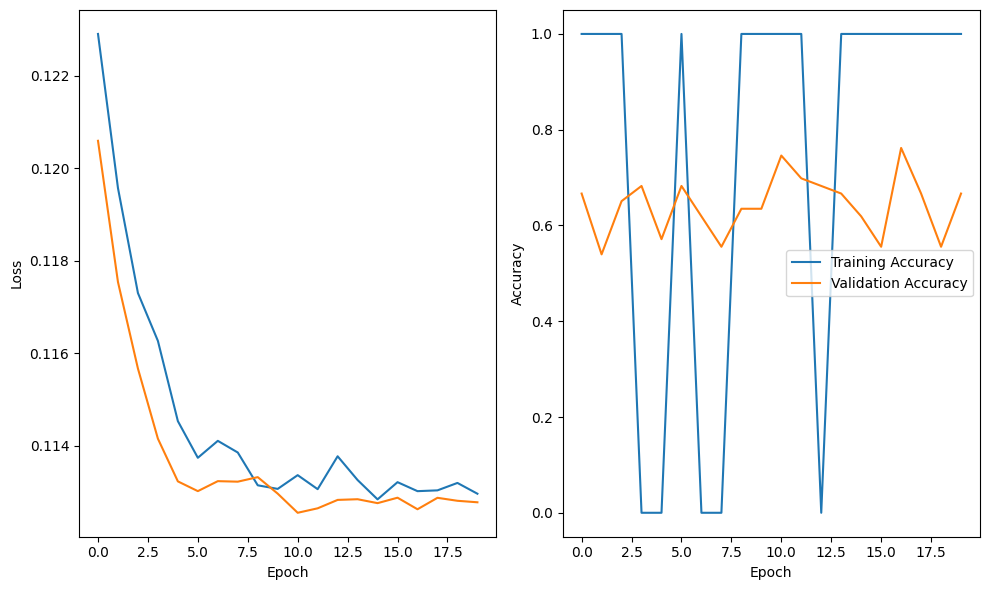

In [35]:
# Plot the losses

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(loss_train, label='Training Loss')
axes[0].plot(loss_valid, label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(acc_train, label='Training Accuracy')
axes[1].plot(acc_valid, label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

plt.legend()
plt.tight_layout()
plt.show()

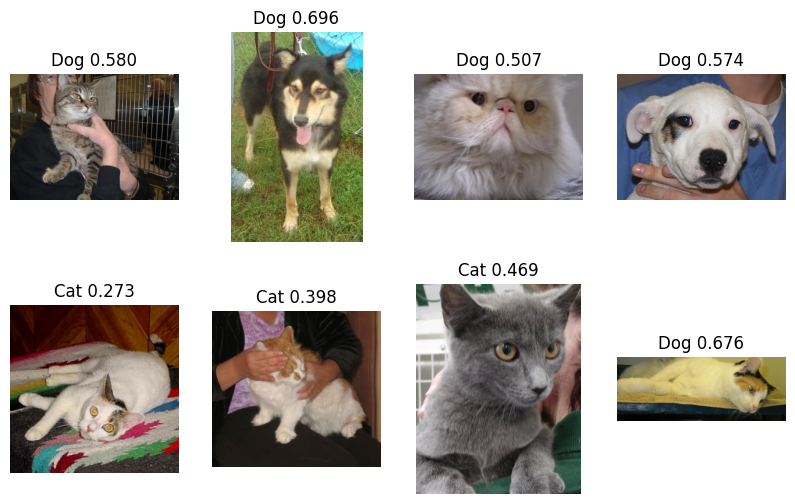

In [36]:
# With the current model predict one image
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Load a set of 6 random images
random_images = random.sample(data_for_testing, 8)

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, img_path in enumerate(random_images):
    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).view(-1, input_size)

    with torch.no_grad():
        output = catdog_model.forward(img_tensor.cuda(0)).item()

    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].set_title(f'Dog {output:.3f}' if output > 0.5 else f'Cat {output:.3f}')
    axes[i//4, i%4].axis('off')



In [5]:
# Clear the GPU memory

torch.cuda.empty_cache()

### CNN and ResNET

In [ ]:
import torchvision.models as models
import torch.nn as nn

class CatVsDog(nn.Module):

  def __init__(self):
    super(CatVsDog, self).__init__()

    self.model = models.resnet18(pretrained=True)
    self.model.fc = nn.Linear(self.model.fc.in_features, 1)

    # Store gradients for Grad-CAM
    self.gradients = None

  def forward(self, x):

    x = self.model(x)
    return torch.sigmoid(x)
  
  # Functions for GradCam Implementation

  def activations_hook(self, grad): # Hook to store the gradients
    self.gradients = grad

  def get_activations_gradient(self): # Get the gradients 
    return self.gradients

  def get_activations(self, x): # Get the activations of the last convolutional layer
    return self.model(x)


In [8]:
from sklearn.metrics import accuracy_score


def fit_ResNET(model, device, dataloader, criterion, optimizer, phase, threshold):
  
    if phase == 'training':
        model.train()
    else:
        model.eval()

    running_loss = []
    for i, data in enumerate(dataloader):

        input = data[0].cuda(device)
        label = data[1].float().cuda(device)

        if phase == 'training':
            optimizer.zero_grad()

        predictions = model(input).view(-1)
        binary_predictions = (predictions > threshold).view(-1).cpu().numpy()

        loss = criterion(predictions, label)
        running_loss.append(loss.item())

        if phase == 'training':
            loss.backward()
            optimizer.step()

        # Computing loss and accuracy
    total_loss = np.asarray(running_loss).mean()
    total_acc = accuracy_score(binary_predictions, label.cpu().numpy())

    
    return total_loss, total_acc

In [9]:
import warnings

warnings.filterwarnings("ignore")

import torch

device = 0
# Define the model

batch_size = 64
num_workers = 8

lr = 1e-4

training_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validation_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)


model_cvd = CatVsDog()
model_cvd.cuda(device)


criterion = nn.BCELoss()

#optimizer = torch.optim.SGD(model_cvd.parameters(), lr = lr, momentum = 0.9, weight_decay = 1e-5)
optimizer = torch.optim.AdamW(model_cvd.parameters(), lr=lr, weight_decay=1e-2)

loss_train = []
loss_test = []

acc_train = []
acc_test = []

# Three epochs
for epoch in range(3):

  print('epoch : ', epoch + 1)

  t_loss, t_acc = fit_ResNET(model_cvd, device, training_dataloader, criterion, optimizer, phase = 'training', threshold=0.5)
  print(f'Training Loss: {t_loss:.3f}')
  print(f'Training Accuracy: {t_acc:.3f}')
  

  test_loss, test_acc = fit_ResNET(model_cvd, device, test_dataloader, criterion, optimizer, phase = 'test', threshold=0.5)
  print(f'Test Loss: {test_loss:.3f}')
  print(f'Test Accuracy: {test_acc:.3f}')

  loss_train.append(t_loss)
  loss_test.append(test_loss)
  
  acc_train.append(t_acc)
  acc_test.append(test_acc)



epoch :  1
Training Loss: 0.062
Training Accuracy: 0.500
Test Loss: 0.045
Test Accuracy: 1.000
epoch :  2
Training Loss: 0.019
Training Accuracy: 1.000
Test Loss: 0.034
Test Accuracy: 0.984
epoch :  3
Training Loss: 0.005
Training Accuracy: 1.000
Test Loss: 0.039
Test Accuracy: 0.984


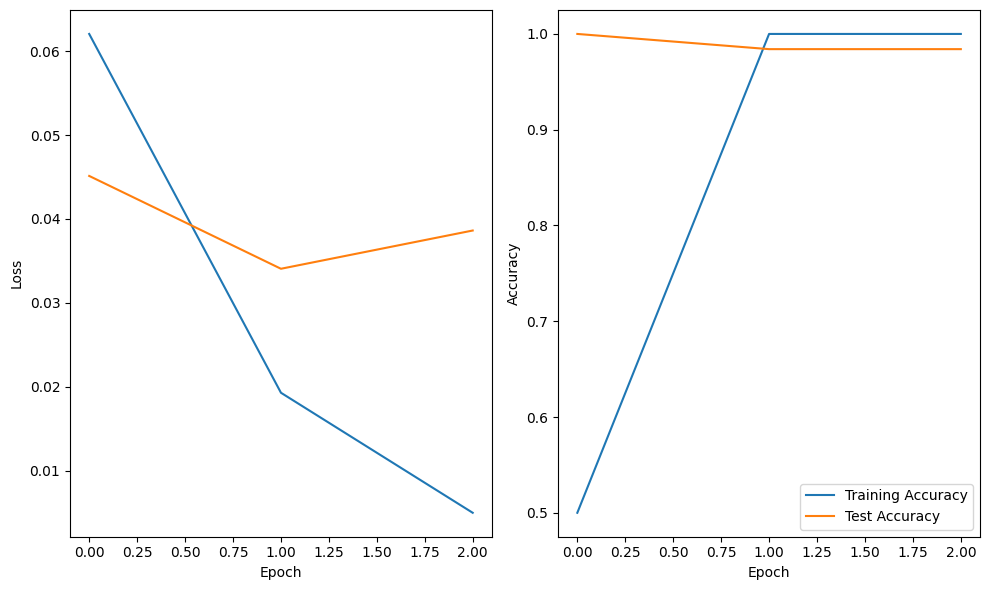

In [10]:
# Plot the losses and accuracy

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(loss_train, label='Training Loss')
axes[0].plot(loss_test, label='Test Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(acc_train, label='Training Accuracy')
axes[1].plot(acc_test, label='Test Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Compute validation accuracy

val_loss, val_acc = fit_ResNET(model_cvd, device, validation_dataloader, criterion, optimizer, phase = 'test', threshold=0.5)

print(f'Validation Loss: {val_loss:.3f}')
print(f'Validation Accuracy: {val_acc:.3f}')

Validation Loss: 0.038
Validation Accuracy: 1.000


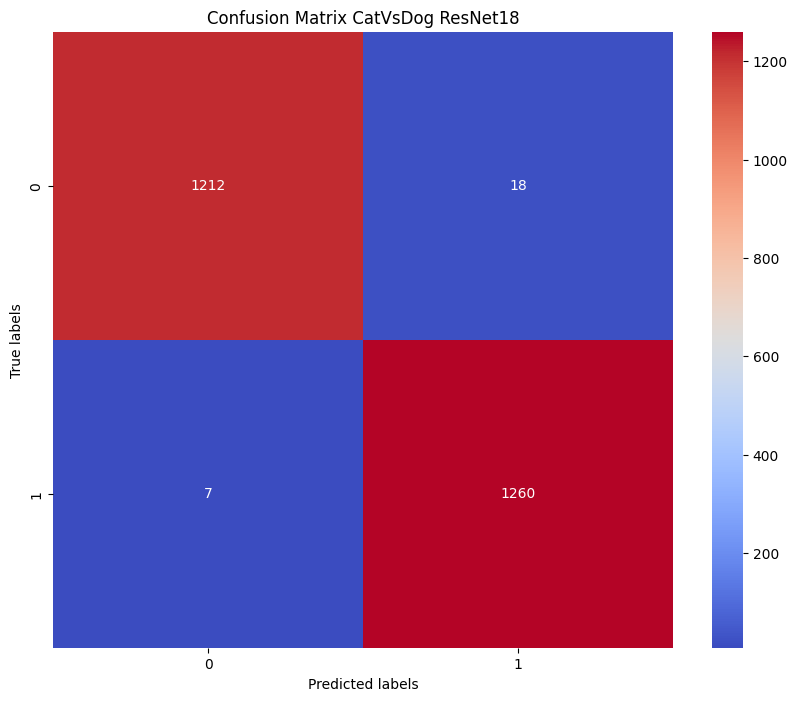

In [12]:
# Plot a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []

for data in validation_dataloader:
    input = data[0].cuda(device)
    label = data[1].float().cuda(device)
    predictions = model_cvd(input).view(-1)

    y_true.extend(label.cpu().numpy())
    y_pred.extend((predictions > 0.5).cpu().numpy())

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CatVsDog ResNet18')
plt.show()    

In [ ]:
import torch.nn.functional as F
import matplotlib.cm as cm
# Implement Grad-CAM for model explanability

class GradCam:
    def __init__(self, model):
        self.model = model

    def forward(self, x):
        
        x = nn.Sequential(*list(self.model.children())[:-2])(x)
        x.register_hook(self.model.activations_hook)

        return self.model(x)

    def get_gradients(self, x):

        x.requires_grad = True
        output = self.forward(x)
        output = output[0]
        
        output.backward()

        return x.grad

    def get_activations(self, x):

        return self.model.get_activations_gradient()

    def overlay_heatmap(self, x, cam):

        heatmap = np.maximum(cam, 0)  # Remove negative values
        heatmap /= np.max(heatmap)  # Normalize the heatmap
        heatmap = np.uint8(255 * heatmap)

        colored_heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) # Apply the colormap

        mask = heatmap < 10
        colored_heatmap[mask] = [0, 0, 0] 

        x = (x+1)/2 # Denormalize the image to [0, 1]
        x = np.clip(x*255, 0, 255).astype(np.uint8)
        x = cv2.cvtColor(x, cv2.COLOR_RGB2BGR)

        plt.imshow(cv2.addWeighted(x, 0.8, colored_heatmap, 0.7, 0))
        plt.axis('off')
        plt.show()

    def compute_cam(self, x):
        
        gradients = self.get_gradients(x)
        activations = self.get_activations(x)

        cam = torch.zeros(activations.shape[2:], dtype=torch.float32).to(device)
        # Gradients are averaged for each feature map
        for i in range(activations.shape[1]):
            cam += activations[0, i] * gradients[0, i]

        cam = F.relu(cam)

        x = x.detach()[0].cpu().numpy().transpose(1, 2, 0)

        self.overlay_heatmap(x, cam.detach().cpu().numpy())


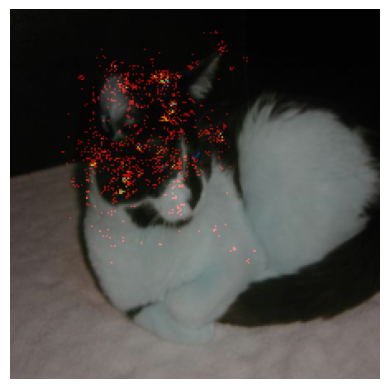

In [26]:
# Load the model and the weights

model = CatVsDog()

grad_cam = GradCam(model_cvd)

# Load a random image
val_cam_img = validation_dataloader.dataset.__getitem__(20)[0].unsqueeze(0).cuda(device)

# Compute the CAM

grad_cam.compute_cam(val_cam_img)
